# Image Thresholding

> Disclaimer:
> This notebook is based on the [Image Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html) tutorial from the OpenCV documentation.
> The images used in this notebook are from the wonderful artist [wavesheep](https://www.deviantart.com/wavesheep)

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import logging

In [6]:
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )

In [22]:
def show_image(img, title=None, scale=1, ax=None):
    figsize = (img.shape[1] * scale/100, img.shape[0] * scale/100)
    logging.info(f"Showing image ... ({' x '.join([str(d) for d in figsize])})")
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax.imshow(img)
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        if title is not None:
            ax.set_title(title)
        plt.show()
    else:
        ax.imshow(img)

[10:34:07] INFO - Showing image ... (10.24 x 8.88)
[10:34:07] INFO - Showing image ... (10.24 x 8.88)


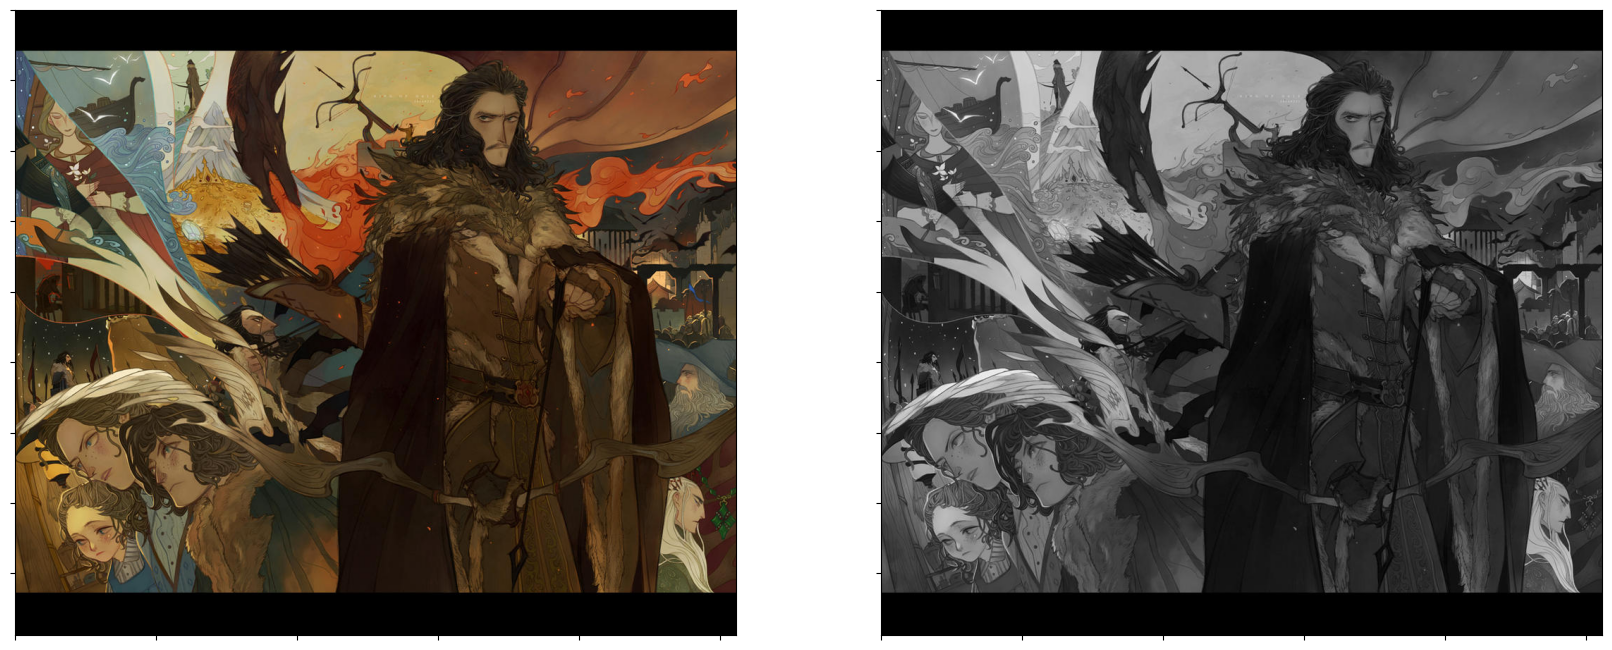

In [25]:
img = cv.imread('../data/wavesheep1.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

height, width = img.shape[:2]
# show_image(cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB))
_, ax = plt.subplots(1, 2, figsize=(width*2/100, height/100))

imgs = [img_rgb, cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)]
for i, ax in enumerate(ax):
    
    show_image(imgs[i], ax=ax)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

plt.show()

## Simple Thresholding

In [30]:
img_gray

array([[6, 5, 4, ..., 2, 2, 2],
       [4, 3, 2, ..., 1, 1, 1],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [4, 3, 2, ..., 1, 1, 1],
       [6, 5, 4, ..., 3, 3, 3]], dtype=uint8)

[10:49:32] INFO - Showing image ... (10.24 x 8.88)
[10:49:32] INFO - Showing image ... (10.24 x 8.88)
[10:49:32] INFO - Showing image ... (10.24 x 8.88)
[10:49:32] INFO - Showing image ... (10.24 x 8.88)
[10:49:32] INFO - Showing image ... (10.24 x 8.88)


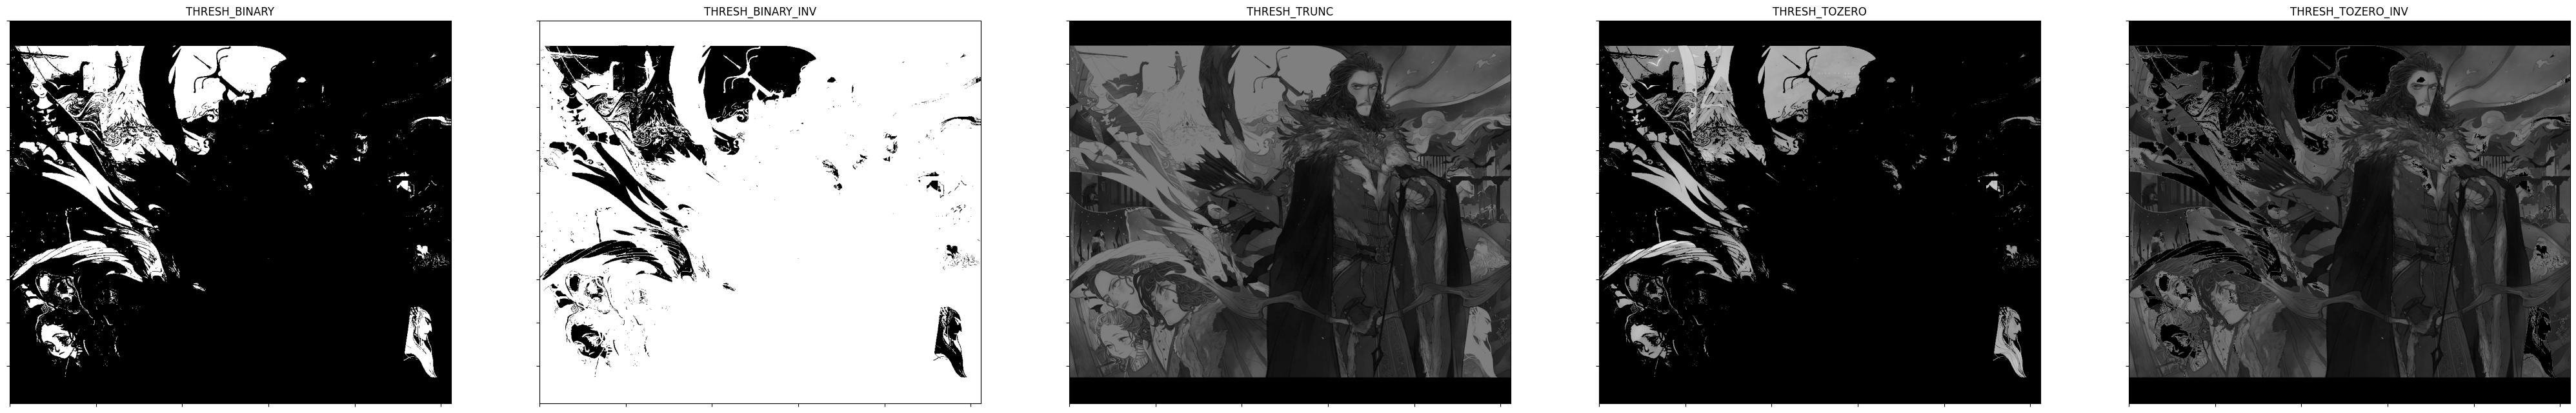

In [45]:
threshold_value = (img_gray.max() - img_gray.min()) / 2
new_value = 255
thresholding_method = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV]
thresholding_method_names = ["THRESH_BINARY", "THRESH_BINARY_INV", "THRESH_TRUNC", "THRESH_TOZERO", "THRESH_TOZERO_INV"]
imgs = [
    p[1] for p in [cv.threshold(img_gray, threshold_value, new_value, method) for method in thresholding_method]
]

_, ax = plt.subplots(1, 5, figsize=(width*len(imgs)/100, height/100))
for i, im in enumerate(imgs):
    show_image(cv.cvtColor(im, cv.COLOR_GRAY2RGB), ax=ax[i])
    ax[i].set_title(thresholding_method_names[i])
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
plt.show()